# Homework Assignment 2

## Section 1: Admissions Dataset

In [1]:
#First round of imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

In [3]:
#Target Variable is admit
#Features are gre, gpa, prestige
#gre and gpa are continuous. prestige is categorical (you may be able to convince me otherwise, but let's go with this assessment)

admissions.admit.value_counts(normalize=True)
#68.25% is the null accuracy


0    0.6825
1    0.3175
Name: admit, dtype: float64

In [4]:
pres_dums = pd.get_dummies(admissions.prestige, prefix = "pres", drop_first=True)
pres_dums.head()
admissions.drop("prestige", axis= 1, inplace=True)
admissions = pd.concat([admissions, pres_dums], axis=1)
admissions.head()

,admit,gre,gpa,pres_2.0,pres_3.0,pres_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


**Question 2:**

What do you think is the goal of using machine learning with this dataset.

In [5]:
#predict if a student will be admitted to the school

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

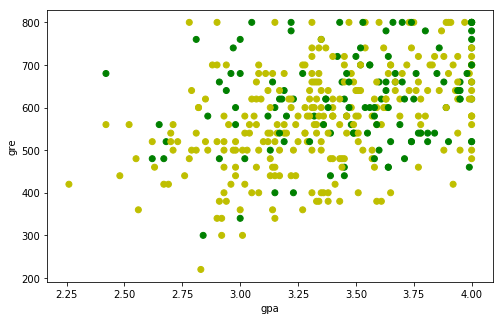

In [6]:
plt.figure(figsize=(8, 5))

colors = admissions.admit.map({0: "y", 1:"g"})
plt.scatter(admissions.gpa, admissions.gre, c=colors)

#Label x and y axes
plt.xlabel("gpa")
plt.ylabel("gre")
plt.show()

#combination of gre and gpa scores that were admitted or not

**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sb
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
admissions.info()
admissions.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
pres_2.0    400 non-null uint8
pres_3.0    400 non-null uint8
pres_4.0    400 non-null uint8
dtypes: float64(2), int64(1), uint8(3)
memory usage: 10.6 KB


In [19]:
X = admissions.drop("admit", axis=1)
y = admissions.admit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


lr = LogisticRegression()
lr.fit(X_train, y_train)

score = lr.score(X_test,y_test)
print ("The test model produces an accuracy score of {:.2f} percent".format(score*100))
#78% is somewhat better than the null accuracy

score = lr.score(X_train,y_train)
print ("The train model produces an accuracy score of {:.2f} percent".format(score*100))
#68.69% is less than the test data - so not overfitting

The test model produces an accuracy score of 75.00 percent
The train model produces an accuracy score of 68.35 percent


**Question 5:** Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

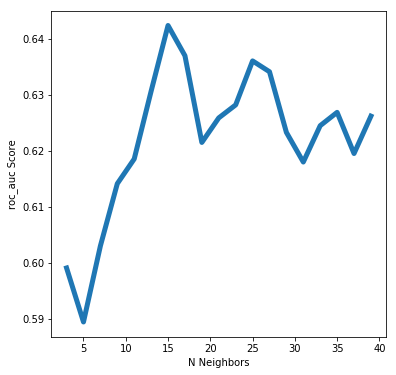

In [10]:
#Initialize neighbors list
neighbors = range(3, 41, 2)
#Intialize list with cross validated scores
cv_scores = []

for i in neighbors:
    #Fit model with i
    model = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(model, X, y, cv =5 , scoring="roc_auc").mean()
    #Append cv_score to cv_scores
    cv_scores.append(cv_score)
    
#Plot line plot of neighbors vs cv_scores
plt.figure(figsize=(6, 6))
plt.plot(neighbors, cv_scores, linewidth = 5)
plt.xlabel("N Neighbors")
plt.ylabel("roc_auc Score")
plt.show()

#n=15 gives a score of ~.642

In [11]:
#instructions said to use grid search so let's do that

#Range of neighbors to test
neighbors_range = range(1, 41, 2)

#Dictionary of parameter values 
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbors_range

grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "roc_auc")
grid_knn.fit(X, y)
#grid_knn.best_score_
grid_knn.best_params_


{'n_neighbors': 15}

In [12]:
grid_knn.best_score_

0.6425406555381367

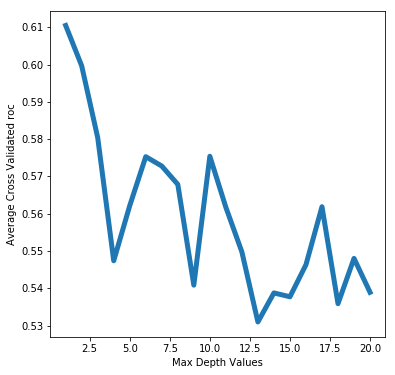

In [13]:
#Let's find the best max_depth for a Decision Tree
depths = range(1, 21)

cv_scores = []

for i in depths:
    cv = cross_val_score(DecisionTreeClassifier(max_depth=i), X, y, cv =5, scoring="roc_auc")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)

plt.figure(figsize=(6, 6))
plt.plot(depths, cv_scores, linewidth = 5)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated roc");

#max depth of 1 gives roc_auc of ~.61

In [14]:
#instructions said to use grid search so let's do that

depth_range = range(1, 21, 2)

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depth_range

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "roc_auc")
grid_dt.fit(X, y)
#grid_dt.best_score_
grid_dt.best_params_


{'max_depth': 1}

In [15]:
grid_dt.best_score_

0.6104154442441596

K-Nearest Neighbors seems better

**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

Probably better to minimize false negatives because, while there is a cost, the penalty of admitting a student does not seem as bad as rejecting a student who deserves admission.

**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

In [16]:
X_new = pd.DataFrame({'gre': [560, 750, 660], 'gpa': [3.6, 3.8, 3.1], 'pres_2.0': [1,0,0], 'pres_3.0': [0,0,0], 'pres_4.0':[0,1,0]})

In [17]:
X_new

,gpa,gre,pres_2.0,pres_3.0,pres_4.0
0,3.6,560,1,0,0
1,3.8,750,0,0,1
2,3.1,660,0,0,0


In [27]:
X = admissions.drop("admit", axis=1)


lr.predict_proba(X_new)[:, 1]

array([ 1.,  1.,  1.])

1 seems too certain *Ask George

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [28]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])

data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [29]:
#First let's use basic EDA
data.isnull().sum()
#ok so we don't need to drop features based on incomplete data

haight          0
mission         0
soma            0
sunset          0
richmond        0
glen_park       0
castro          0
potrero         0
hayes_valley    0
fillmore        0
bernal          0
marina          0
north_beach     0
excelsior       0
target          0
dtype: int64

In [30]:
#We can start with Logistic Regression just to get a baseline model of the data
X = data.drop("target", axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=4)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Evaulate on accuracy for now
score = lr.score(X,y)
print ("The accuracy score is {:.2f} percent".format(score*100))

The accuracy score is 77.25 percent


In [31]:
#Null accuracy
y.value_counts(normalize=True)*100

0    63.825
1    36.175
Name: target, dtype: float64

OK not bad - we are better than the null accuracy but there is room for improvement

In [32]:
#Next let's look at feature correlation

data.corr()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
haight,1.000000,-0.691099,-0.003451,0.017411,0.023025,-0.055019,-0.106320,-0.034309,-0.299097,0.006428,0.164962,0.028713,0.324309,-0.423019,-0.171926
mission,-0.691099,1.000000,0.013116,-0.006411,0.448394,0.023159,0.229411,0.248336,0.672682,-0.004066,-0.223609,-0.013775,-0.132077,0.508043,0.136988
soma,-0.003451,0.013116,1.000000,-0.017127,-0.008683,0.023943,0.033782,0.008518,0.011988,-0.003719,-0.015025,-0.003473,-0.021821,0.030777,0.010718
sunset,0.017411,-0.006411,-0.017127,1.000000,0.028527,-0.017834,0.011205,0.017100,-0.018217,0.000801,-0.007153,0.004034,-0.024942,-0.000102,-0.026396
richmond,0.023025,0.448394,-0.008683,0.028527,1.000000,0.011149,-0.038702,0.076728,0.091362,-0.007679,-0.202575,-0.023585,-0.067719,0.170600,-0.196710
glen_park,-0.055019,0.023159,0.023943,-0.017834,0.011149,1.000000,0.119650,-0.043640,-0.034043,0.010605,-0.019650,0.006034,-0.432634,0.374960,0.005610
castro,-0.106320,0.229411,0.033782,0.011205,-0.038702,0.119650,1.000000,-0.019393,0.118713,0.016342,0.063033,0.006320,-0.278914,0.441421,0.187220
potrero,-0.034309,0.248336,0.008518,0.017100,0.076728,-0.043640,-0.019393,1.000000,-0.044419,-0.035553,0.093639,0.033770,0.060056,-0.368261,-0.199197
hayes_valley,-0.299097,0.672682,0.011988,-0.018217,0.091362,-0.034043,0.118713,-0.044419,1.000000,0.015605,0.105327,0.001810,-0.011746,0.453605,0.176853
fillmore,0.006428,-0.004066,-0.003719,0.000801,-0.007679,0.010605,0.016342,-0.035553,0.015605,1.000000,-0.003304,-0.019405,-0.006632,0.026074,0.028804


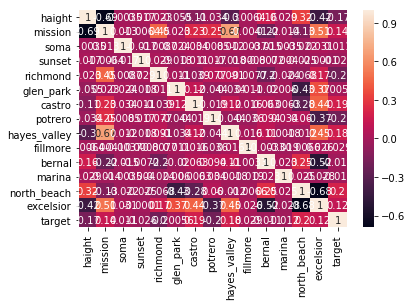

In [33]:
sb.heatmap(data.corr(), annot=True)

In [42]:
#Excelsior and Mission have high multicolinearity with other dimensions so let's drop them
#Keep north_beach - seems valuable
df = data.copy()
df.drop(["excelsior", "mission"], axis=1, inplace=True)

In [43]:
#Try again with LR
X = df.drop("target", axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=4)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Evaulate on accuracy for now
score = lr.score(X,y)
print ("The accuracy score is {:.2f} percent".format(score*100))

#Quick doublecheck with cross validation
cross_val_score(lr, X, y, cv =5 , scoring="accuracy").mean()

#not overfit

The accuracy score is 77.25 percent


0.76624877070120423

In [48]:
#play with dropping features to see if it improves the score
#Try again with Decision Tree
y = df.target
X = df.drop(["target", "haight", "marina","fillmore", "sunset"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=4)
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

#Evaulate on accuracy for now
score = dc.score(X,y)
print ("The accuracy score is {:.2f} percent".format(score*100))

#93.65 > 76.62

The accuracy score is 93.53 percent


In [49]:
X.columns #down to 8 - getting rid of haight helped

Index([u'soma', u'richmond', u'glen_park', u'castro', u'potrero',
       u'hayes_valley', u'bernal', u'north_beach'],
      dtype='object')

In [50]:
#Just for good measure let's cross validate
cross_val_score(dc, X, y, cv =5 , scoring="accuracy").mean()
#.81 - not as good as .93, but still better than previous models

0.8150025808634076

No difference - 77.25 percent

In [51]:
#Let's try a Decision Tree Model but using GridSearch
depths_range = range(2, 20)
param_grid_dt = {"criterion": ["gini"], "max_depth": depths_range}
param_grid_dt["min_samples_split"] =[2, 10, 20]
param_grid_dt["max_features"] = [2, 4, 6, 8]

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Intialize Grid
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
#Fit grid on data
grid_dt.fit(X, y)

#Best parameter
grid_dt.best_params_

# 'max_depth': 11
# 'max_features': 6

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 6,
 'min_samples_split': 2}

In [52]:
#Best score
grid_dt.best_score_
#0.832 - a little better than .81 without parameters set

0.832

In [53]:
#One more - try KNN with Grid Search with the features we decided on in previous runs

y = df.target
X = df.drop(["target", "haight", "marina","fillmore", "sunset"], axis=1)

neighbors_range = range(1, 21, 2)
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbors_range

knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "accuracy")
knn.fit(X, y)
knn.best_params_
#17 neighbors

{'n_neighbors': 17}

In [54]:
knn.best_score_
#90.8 - seems the best of all 3 models we tried

0.908

In [55]:
#OK I'm curious - let's run the same against the full dataset to see how much the feature engineering helped
#Try again with KNN
y = data.target
X = data.drop(["target"], axis=1)

neighbors_range = range(1, 21, 2)
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbors_range

knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "accuracy")
knn.fit(X, y)
knn.best_score_
#89.9 - looks like our benefits came more from choosing the right model rather than reducing features, but still better to have a smaller dataset

0.89925

## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

In [57]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [58]:
movies.shape

(5043, 28)

In [59]:
df = movies.copy()
df.set_index("movie_title", inplace=True)

In [60]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [61]:
#Imputation
df.duration.fillna(df.duration.median(), inplace = True)
df.num_critic_for_reviews.fillna(df.num_critic_for_reviews.median(), inplace = True)
df.num_user_for_reviews.fillna(df.num_user_for_reviews.median(), inplace = True)
df.director_facebook_likes.fillna(df.director_facebook_likes.median(), inplace = True)
df.actor_1_facebook_likes.fillna(df.actor_1_facebook_likes.median(), inplace = True)
df.actor_2_facebook_likes.fillna(df.actor_2_facebook_likes.median(), inplace = True)
df.actor_3_facebook_likes.fillna(df.actor_3_facebook_likes.median(), inplace = True)
df.facenumber_in_poster.fillna(df.facenumber_in_poster.median(), inplace=True)
df.budget.fillna(df.budget.median(), inplace = True)

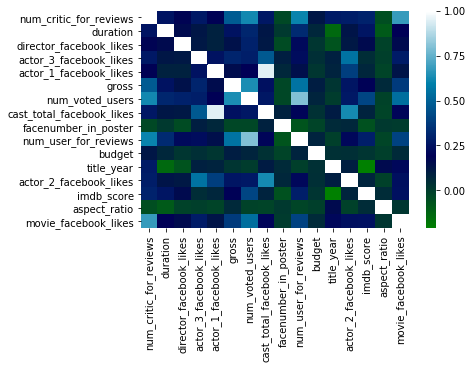

In [62]:
sb.heatmap(df.corr(), annot=False, cmap="ocean")

In [63]:
#drop missing grosses
dropnulls = df.gross.isnull()
dropnulls = dropnulls[dropnulls].index
df = df.drop(dropnulls)

#drop text fields
df.drop(["director_name", "actor_1_name", "actor_2_name", "actor_3_name", "genres", "plot_keywords", "movie_imdb_link"], axis=1, inplace=True)

#drop colinear fields
df.drop(["cast_total_facebook_likes","num_user_for_reviews", "movie_facebook_likes", "num_critic_for_reviews"], axis=1, inplace=True)

#drop seemingly usless columns
df.drop(["aspect_ratio", "title_year", "facenumber_in_poster"], axis=1, inplace=True)

In [43]:
df.head()

,color,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score
movie_title,,,,,,,,,,,,,
Avatar,Color,178.0,0.0,855.0,1000.0,760505847.0,886204,English,USA,PG-13,237000000.0,936.0,7.9
Pirates of the Caribbean: At World's End,Color,169.0,563.0,1000.0,40000.0,309404152.0,471220,English,USA,PG-13,300000000.0,5000.0,7.1
Spectre,Color,148.0,0.0,161.0,11000.0,200074175.0,275868,English,UK,PG-13,245000000.0,393.0,6.8
The Dark Knight Rises,Color,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,English,USA,PG-13,250000000.0,23000.0,8.5
John Carter,Color,132.0,475.0,530.0,640.0,73058679.0,212204,English,USA,PG-13,263700000.0,632.0,6.6


In [64]:
df.drop("language", axis=1, inplace=True) #language and country probably related
#on second thought let's just focus on US movies
df = df[df.country == "USA"]
df.drop("country", axis=1, inplace=True)

In [65]:
#Categorical categories
#from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder, LabelBinarizer
df.color.fillna(value="Color", inplace=True)
color_dict = {"Black and White":0, "Color":1}
df["color"]= df.color.map(color_dict)

In [66]:
df.content_rating.fillna(value="Not Rated", inplace=True)
rating_dums = pd.get_dummies(df.content_rating, prefix="rating", drop_first=True)
df.drop("content_rating", axis= 1, inplace=True)
df = pd.concat([df, rating_dums], axis=1)

In [67]:
df.head()

,color,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,budget,actor_2_facebook_likes,imdb_score,rating_G,rating_M,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,rating_Unrated,rating_X
movie_title,,,,,,,,,,,,,,,,,,,,
Avatar,1.0,178.0,0.0,855.0,1000.0,760505847.0,886204,237000000.0,936.0,7.9,0,0,0,0,0,1,0,0,0,0
Pirates of the Caribbean: At World's End,1.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,300000000.0,5000.0,7.1,0,0,0,0,0,1,0,0,0,0
The Dark Knight Rises,1.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,250000000.0,23000.0,8.5,0,0,0,0,0,1,0,0,0,0
John Carter,1.0,132.0,475.0,530.0,640.0,73058679.0,212204,263700000.0,632.0,6.6,0,0,0,0,0,1,0,0,0,0
Spider-Man 3,1.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,258000000.0,11000.0,6.2,0,0,0,0,0,1,0,0,0,0


In [68]:
df.gross.mean()

55214607.22874807

In [69]:
#Try with Linear Regression
df.color.fillna(value="1", inplace=True)
from sklearn.linear_model import LinearRegression

X = df.drop("gross", axis=1)
y = df.gross

# define a function that accepts X and y and computes testing RMSE
def cross_val_rmse(X, y):
    lr = LinearRegression()
    scores = cross_val_score(lr, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean() # return average RMSE

cross_val_rmse(X, y)

#43,234,871 - this is high, I would expect in thousands 

/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo

43234871.60601899

In [70]:
#Try with Ridge Regression
from sklearn.linear_model import Ridge

X = df.drop("gross", axis=1)
y = df.gross

# define a function that accepts X and y and computes testing RMSE
def cross_val_rmse(X, y):
    ridge = Ridge(alpha=0.4) #with more time optimize alpha
    scores = cross_val_score(ridge, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean() # return average RMSE

cross_val_rmse(X, y)

#43,088,927

/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo

43088927.724611923

In [71]:
#Try with Lasso Regression
from sklearn.linear_model import Lasso

X = df.drop("gross", axis=1)
y = df.gross

# define a function that accepts X and y and computes testing RMSE
def cross_val_rmse(X, y):
    lasso = Lasso(alpha=0.4) #with more time optimize alpha
    scores = cross_val_score(lasso, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean() # return average RMSE

cross_val_rmse(X, y)

#43,218,515

/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/villager/Programs/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_e

43218515.352466442

Linear seems to be the best with this evaluation 

In [72]:
#predict Black Panther - not enough information
#df_bp = pd.DataFrame({'color': 1, 'duration':120, 'director_facebook_likes': 1714, 'actor_1_facebook_likes': 179034, 'actor_2_facebook_likes': 804493, 'actor_3_facebook_likes': 2969128,})

#Let's look at The Post
df_post = pd.DataFrame({'color': [1], 'duration':[115], 'num_voted_users':[5971], 'director_facebook_likes': [114599], 'actor_1_facebook_likes': [152592], 'actor_2_facebook_likes': [7370349], 'actor_3_facebook_likes': [9141], 'budget': [50000000], 'rating_PG-13': [1], 'imdb_score': [7.5], 'rating_G':[0], 'rating_M':[0], 'rating_NC-17':[0], 'rating_Not Rated':0,'rating_PG':[0], u'rating_PG-13':[0], 'rating_Passed':[0], 'rating_R':[0],'rating_Unrated':[0], 'rating_X':[0]})
df_post

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,color,director_facebook_likes,duration,imdb_score,num_voted_users,rating_G,rating_M,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,rating_Unrated,rating_X
0,152592,7370349,9141,50000000,1,114599,115,7.5,5971,0,0,0,0,0,0,0,0,0,0


In [73]:
#Predict with Linear Regression
X = df.drop("gross", axis=1)
y = df.gross
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df_post)

#$69,555,119,900 - that's billion? Something is wrong

array([  6.95551199e+10])

## Bonus!!

<br>

Code a K-Nearest Neighbors model from scratch using just python, that means no external libraries such as numpy. This may seem daunting but it's a lot easier than you think. Hint: Use a Class to create the algorithm.